## torch.cat()

In [2]:
import torch

In [4]:
t = torch.ones((2,3))

t_0 = torch.cat([t,t], dim = 0)

t_1 = torch.cat([t,t], dim = 1)

In [5]:
t_0

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [6]:
t_1

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

## torch.chunk()

In [9]:
a = torch.ones((2,7))
list_of_tensors = torch.chunk(a, dim=1, chunks =3)

for idx, t in enumerate(list_of_tensors):
    print("No.{} tensor: {}, shape is {}".format(idx+1, t, t.shape))

No.1 tensor: tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
No.2 tensor: tensor([[1., 1., 1.],
        [1., 1., 1.]]), shape is torch.Size([2, 3])
No.3 tensor: tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])


## torch.split()

In [10]:
a = torch.ones((2,5))
list_of_tensors = torch.split(a, [2,1,2], dim=1)

for idx, t in enumerate(list_of_tensors):
    print("No.{} tensor: {}, shape is {}".format(idx+1, t, t.shape))

No.1 tensor: tensor([[1., 1.],
        [1., 1.]]), shape is torch.Size([2, 2])
No.2 tensor: tensor([[1.],
        [1.]]), shape is torch.Size([2, 1])
No.3 tensor: tensor([[1., 1.],
        [1., 1.]]), shape is torch.Size([2, 2])


## torch.index_select()

In [13]:
t = torch.randint(0,9, size = (3,3))
idx = torch.tensor([0,2])
t_select = torch.index_select(t, dim=0, index=idx)

print("t:\n{}\nt_select:\n{}".format(t, t_select))

t:
tensor([[1, 5, 5],
        [8, 8, 7],
        [8, 3, 8]])
t_select:
tensor([[1, 5, 5],
        [8, 3, 8]])


## torch.masked_select()

In [15]:
t = torch.randint(0,9, size = (3,3))
mask = t.ge(5)
t_select = torch.masked_select(t, mask)

print("t:\n{}\nmask:\n{}\nt_select:\n{}".format(t, mask, t_select))

t:
tensor([[0, 1, 7],
        [4, 4, 5],
        [0, 4, 6]])
mask:
tensor([[False, False,  True],
        [False, False,  True],
        [False, False,  True]])
t_select:
tensor([7, 5, 6])


## torch.reshape()

In [16]:
t = torch.randperm(8)
t_reshape = torch.reshape(t, (2,4))

print("t:\n{}\nt_reshape:\n{}".format(t, t_reshape))

t:
tensor([7, 5, 3, 4, 2, 6, 1, 0])
t_reshape:
tensor([[7, 5, 3, 4],
        [2, 6, 1, 0]])


## torch.add()

In [19]:
t_0 = torch.randn((3,3))
t_1 = torch.ones_like(t_0)
t_add = torch.add(t_0, 10, t_1)

print("t_0:\n{}\nt_1:\n{}\nt_add:\n{}".format(t_0, t_1, t_add))

t_0:
tensor([[-0.6974, -0.7791, -0.4557],
        [-0.7229, -1.5595,  1.5851],
        [ 1.1120,  0.3162, -0.4607]])
t_1:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
t_add:
tensor([[ 9.3026,  9.2209,  9.5443],
        [ 9.2771,  8.4405, 11.5851],
        [11.1120, 10.3162,  9.5393]])


## Use pytorch to train a linear regression model

In [29]:
import torch
import matplotlib.pyplot as plt
torch.manual_seed(10)

lr = 0.05  # learning rate

# create the training data
x = torch.rand(20, 1) * 10  # x data (tensor), shape=(20, 1)
y = 0.5*x + (5 + torch.randn(20, 1))  # y data (tensor), shape=(20, 1)

In [30]:
# declare w, b
w = torch.randn((1), requires_grad=True)
b = torch.zeros((1), requires_grad=True)

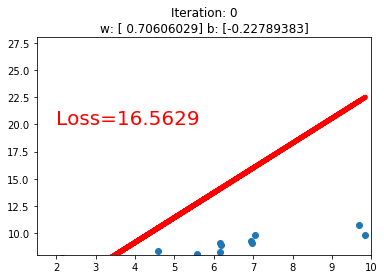

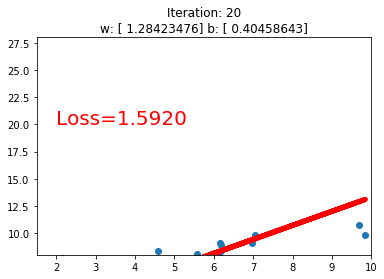

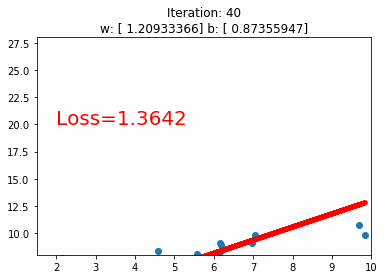

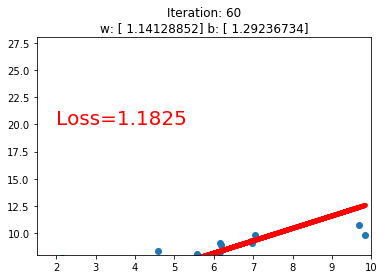

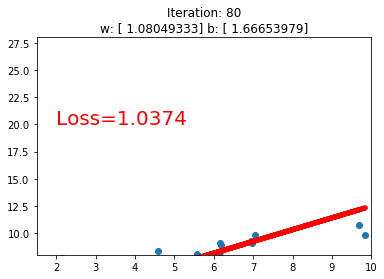

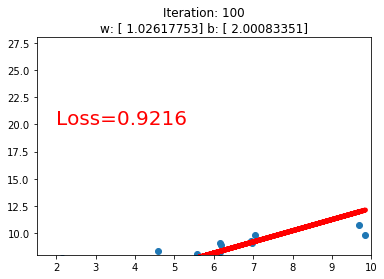

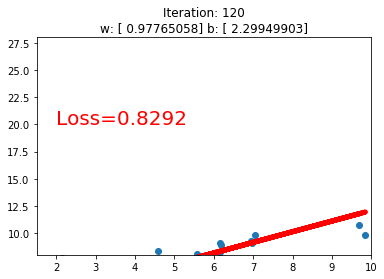

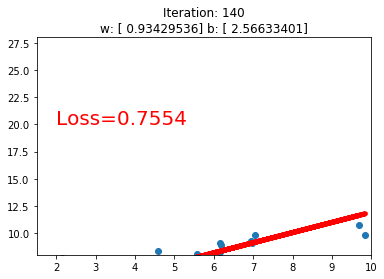

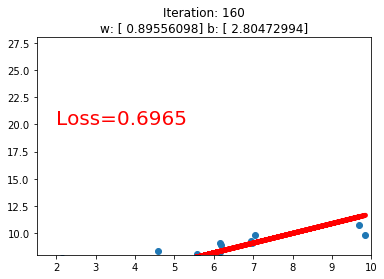

In [31]:
for iteration in range(1000):

    # forward
    wx = torch.mul(w, x)
    y_pred = torch.add(wx, b)

    # MSE loss
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # backward
    loss.backward()

    # update w, b
    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)

    # set gradient to 0
    w.grad.zero_()
    b.grad.zero_()

    # draw the graph
    if iteration % 20 == 0:

        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), y_pred.data.numpy(), 'r-', lw=5)
        plt.text(2, 20, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.xlim(1.5, 10)
        plt.ylim(8, 28)
        plt.title("Iteration: {}\nw: {} b: {}".format(iteration, w.data.numpy(), b.data.numpy()))
        plt.pause(0.5)

        if loss.data.numpy() < 0.75:
            break